In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [5]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
print(df_DA_US) 


       job_title_short     job_title         job_location          job_via  \
36        Data Analyst  Data Analyst       Des Moines, IA  via Trabajo.org   
155       Data Analyst  Data Analyst            Tampa, FL     via LinkedIn   
332       Data Analyst  Data Analyst        Mossville, IL  via Trabajo.org   
385       Data Analyst  Data Analyst         Waukesha, WI  via Trabajo.org   
476       Data Analyst  Data Analyst        St Peters, MO  via Trabajo.org   
...                ...           ...                  ...              ...   
784841    Data Analyst  Data Analyst           California  via Trabajo.org   
784929    Data Analyst  Data Analyst    Pleasant Hill, CA  via Trabajo.org   
785078    Data Analyst  Data Analyst         Columbia, SC  via Trabajo.org   
785539    Data Analyst  Data Analyst  Fairfax Station, VA      via Monster   
785685    Data Analyst  Data Analyst     Indianapolis, IN  via Trabajo.org   

       job_schedule_type  job_work_from_home            search_

In [6]:
df_DA_US['job_posted_date'] = pd.to_datetime(df_DA_US['job_posted_date'], errors='coerce')
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month


In [16]:
df_DA_US['job_skills'] = df_DA_US['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else x
)


df_DA_US = df_DA_US.explode('job_skills')
print(df_DA_US.head())

    job_title_short     job_title    job_location          job_via  \
36     Data Analyst  Data Analyst  Des Moines, IA  via Trabajo.org   
155    Data Analyst  Data Analyst       Tampa, FL     via LinkedIn   
155    Data Analyst  Data Analyst       Tampa, FL     via LinkedIn   
155    Data Analyst  Data Analyst       Tampa, FL     via LinkedIn   
155    Data Analyst  Data Analyst       Tampa, FL     via LinkedIn   

    job_schedule_type  job_work_from_home          search_location  \
36          Full-time               False  Illinois, United States   
155         Full-time               False   Florida, United States   
155         Full-time               False   Florida, United States   
155         Full-time               False   Florida, United States   
155         Full-time               False   Florida, United States   

        job_posted_date  job_no_degree_mention  job_health_insurance  \
36  2023-11-06 13:01:22                  False                  True   
155 2023-01-19

In [ ]:
df_DA_US_pivot = df_DA_US.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)


df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()


df_DA_US_pivot = df_DA_US_pivot.reindex(columns=df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index)


df_DA_US_pivot = df_DA_US_pivot.drop('Total')



job_skills            sql  excel  tableau  python  power bi  sas    r  word  \
job_posted_month_no                                                           
1                    1138    781      646     529       326  394  338   169   
2                     782    544      408     378       302  270  233   128   
3                     802    580      463     400       277  300  241   142   
4                     845    577      462     421       292  258  238   143   
5                     706    490      367     336       251  206  219    92   
6                     742    491      395     396       272  202  252   126   
7                     560    431      296     292       190  182  188   101   
8                     784    641      480     460       292  272  321   112   
9                     485    336      277     253       183  150  157    65   
10                    556    343      308     270       207  150  154    76   
11                    472    291      246     234   

In [ ]:

DA_totals = df_DA_US_pivot.sum(axis=1)
df_DA_US_percent = df_DA_US_pivot .div(DA_totals/100, axis = 0)
df_DA_US_percent = df_DA_US_percent .reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent .set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent .drop(columns = 'job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,15.967448,10.958327,9.064122,7.422478,4.574155,5.528273,4.742528,2.371264,2.469482,2.301108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,15.369497,10.691824,8.018868,7.429245,5.935535,5.306604,4.579403,2.515723,2.555031,1.945755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,15.143505,10.951662,8.742447,7.552870,5.230363,5.664653,4.550604,2.681269,2.398036,2.020393,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,15.369225,10.494725,8.403056,7.657330,5.311022,4.692615,4.328847,2.600946,2.419061,2.218989,...,0.018188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,15.965626,11.080959,8.299412,7.598372,5.676165,4.658526,4.952510,2.080507,2.691090,2.216192,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,15.474453,10.239833,8.237748,8.258603,5.672576,4.212722,5.255474,2.627737,2.419187,2.064651,...,0.000000,0.000000,0.000000,0.000000,0.020855,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,15.172040,11.677052,8.019507,7.911135,5.147656,4.930913,5.093471,2.736386,2.736386,1.679762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027093,0.027093
Aug,14.459609,11.822206,8.852822,8.483954,5.385467,5.016599,5.920325,2.065658,2.452969,1.807451,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,15.382176,10.656518,8.785284,8.024104,5.803996,4.757374,4.979385,2.061529,1.680939,2.124960,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031716,0.000000,0.000000,0.000000


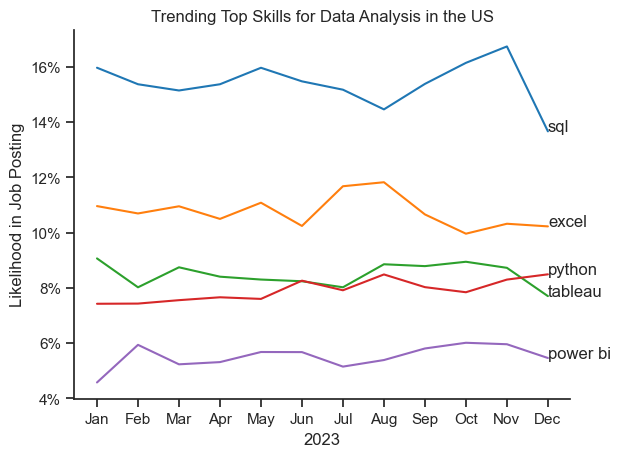

In [40]:
 df_plot =df_DA_US_percent.iloc[:, :5]

sns.lineplot(data = df_plot , dashes =False, palette ='tab10')
sns.set_theme(style = 'ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysis in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals = 0))

for i in range(5):
    plt.text(11,df_plot.iloc[-1,i],df_plot.columns[i])
 